# 001 Microstructure Project 
### Nicolas Ramirez Castro
### Maximiliano Hernandez Aparicio 

## 1-. Introducción al proyecto



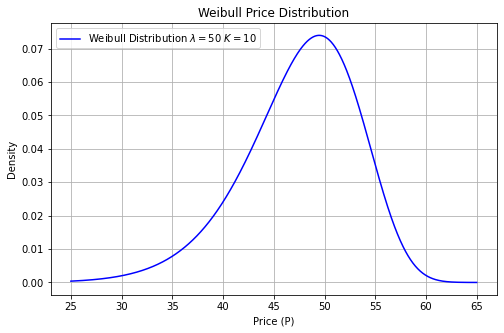

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parámetros del modelo
lambda_weibull = 50  # Parámetro de escala
k_weibull = 10  # Parámetro de forma
pi_I = 0.4  # Probabilidad de una operación informada
p0 = 51  # Precio inicial

# Funciones de probabilidad para los traders de liquidez
S_values = np.linspace(0, 7, 100)
pi_LB_S = 0.5 - 0.08 * S_values
pi_LS_S = 0.5 - 0.08 * S_values

# Distribución de precios de la Weibull
x = np.linspace(25, 65, 1000)
pdf_weibull = weibull_min.pdf(x, k_weibull, scale=lambda_weibull)

def plot_weibull_distribution():
    """Grafica la distribución de precios Weibull."""
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf_weibull, label=r"Weibull Distribution $\lambda = 50$ $K = 10$", color="blue")
    plt.xlabel("Price (P)")
    plt.ylabel("Density")
    plt.title("Weibull Price Distribution")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_weibull_distribution()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from price_simulation import S_values, pi_LB_S, pi_LS_S, pi_I, p0

# Cálculo de ingresos esperados
Q = S_values  # Ingresos si todos los traders son de liquidez
R = (1-pi_I) * S_values # Ingresos para liquidez con la probabilidad dada
Expected_Revenue = (1-pi_I) * pi_LB_S  * S_values

def plot_bid_ask_spread():
    """Grafica el spread Bid-Ask y los ingresos esperados."""
    plt.figure(figsize=(8, 5))
    plt.plot(S_values, Q, label="Todos los traders son de liquidez", color="red")
    plt.plot(S_values, R, label="Probabilidad de 40% de un trade informado", color="blue")
    plt.plot(S_values, Expected_Revenue, label="Expected Revenue", color="green")
    plt.xlabel("Bid-Ask Spread (S)")
    plt.ylabel("Money")
    plt.title("Bid-Ask Spread")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_bid_ask_spread()


ModuleNotFoundError: No module named 'price_simulation'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def optimize_spread(p0=51, pi_I=0.4, S_range=(0, 7)):
    """
    Optimiza el spread basado en las probabilidades de traders informados y de liquidez.

    Parámetros:
    - p0: Precio inicial del activo.
    - pi_I: Probabilidad de un trader informado.
    - S_range: Rango de valores para el spread.

    Retorna:
    - S_optimal: Spread óptimo.
    - K_A_opt: Precio óptimo de venta (Ask).
    - K_B_opt: Precio óptimo de compra (Bid).
    """
    pi_L = 1 - pi_I  # Probabilidad de trader de liquidez

    # Función de beneficio esperado
    def expected_profit(S):
        K_A = p0 + S / 2  # Precio Ask
        K_B = p0 - S / 2  # Precio Bid
        return -(pi_L * (K_A - p0) - pi_I * p0)  # Se usa negativo para minimizar

    # Optimización del spread óptimo
    opt_result = minimize(expected_profit, x0=1, bounds=[S_range])
    S_optimal = opt_result.x[0]

    # Cálculo de precios óptimos
    K_A_opt = p0 + S_optimal / 2
    K_B_opt = p0 - S_optimal / 2

    return S_optimal, K_A_opt, K_B_opt

if __name__ == "__main__":
    S_optimal, K_A_opt, K_B_opt = optimize_spread()
    print(f"Optimal Spread: {S_optimal:.2f}")
    print(f"Optimal Ask Price (K_A): {K_A_opt:.2f}")
    print(f"Optimal Bid Price (K_B): {K_B_opt:.2f}")

Optimal Spread: 7.00
Optimal Ask Price (K_A): 54.50
Optimal Bid Price (K_B): 47.50
